In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from hypothesis_tests import chatterjee
from joblib import Parallel, delayed

In [2]:
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams["axes.labelsize"] = 26
mpl.rcParams['legend.fontsize'] = 20
mpl.rcParams['axes.titlesize'] = 26
mpl.rcParams['text.usetex'] = True

In [6]:
def simulate_unif(n, n_sim):
    dist = torch.zeros(n_sim)
    for i in range(n_sim):
        x = torch.rand(n)
        y = torch.rand(n)
        dist[i] = chatterjee(x, y, compute_pvalue=False)
    return np.array(dist)

def simulate_binom(n, n_sim):
    dist = torch.zeros(n_sim)
    for i in range(n_sim):
        x = torch.sum(torch.bernoulli(0.5 *torch.ones((n, 3))), dim=1)
        y = torch.sum(torch.bernoulli(0.5 *torch.ones((n, 3))), dim=1)
        dist[i] = chatterjee(x, y, compute_pvalue=False)
    return np.array(dist)

def simulate_bad_bernoulli(n, n_sim):
    dist = np.zeros((n_sim,))
    for i in range(n_sim):

        # x = torch.tensor(np.random.binomial(1, 0.99, size=(n,)))
        x = torch.rand(n)
        y = torch.tensor(np.random.binomial(1, 0.99, size=(n,)))
        
        dist[i] = chatterjee(x, y, compute_pvalue=False)
    return np.array(dist)

def simulate_bad_poisson(n, n_sim, lam=0.01):
    dist = np.zeros((n_sim,))
    for i in range(n_sim):

        # x = torch.tensor(np.random.binomial(1, 0.99, size=(n,)))
        x = torch.rand(n)
        y = torch.tensor(np.random.poisson(lam=lam, size=(n,)))
        
        dist[i] = chatterjee(x, y, compute_pvalue=False)
    return np.array(dist)

    # def worker():
    #     x = torch.rand(n)
    #     y = torch.tensor(np.random.poisson(lam=lam, size=(n,)))
    #     return chatterjee(x, y, compute_pvalue=False)

    # dist = np.array(Parallel(n_jobs=5)(delayed(worker)() for _ in range(n_sim)))
    # return dist

def get_tau2(y, n):

    R = torch.tensor([(y <= y[i]).sum() for i in range(n)])
    L = torch.tensor([(y >= y[i]).sum() for i in range(n)])
    u = torch.sort(R)[0]
    v = torch.cumsum(u, 0)

    ind = torch.arange(n) + 1
    a = ((2 * n - 2 * ind + 1) * (u ** 2)).sum() / n ** 4
    b = ((v + (n - ind) * u) ** 2).sum() / n ** 5
    c = ((2 * n - 2 * ind + 1) * u).sum() / n ** 3
    d = (L * (n - L)).sum() / n ** 3

    return ((a - 2 * b + c ** 2) / d ** 2).item()


In [3]:
n = 20
n_sim = 10000

unif_dist = simulate_unif(n, n_sim)
np.save(f"results/asymptotic/unif_{n}.npy", unif_dist)

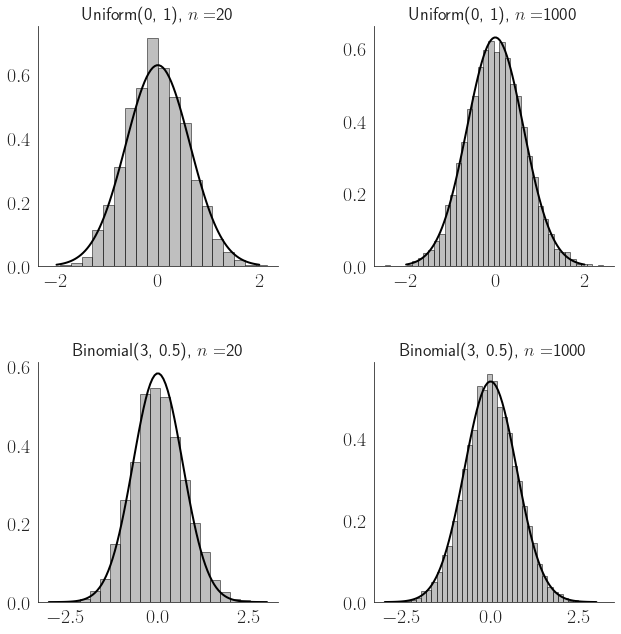

In [45]:
sns.set_style("white")
fontsize = 18

fig, ax = plt.subplots(2, 2, figsize = (10, 10))

###

n = 20
unif_dist = np.load(f"results/asymptotic/unif_{n}.npy")

# Asymptotic distribution.
x = np.linspace(-2,2, 100) 
f = np.exp(-x ** 2 / (2 * 0.4)) / np.sqrt(2 * np.pi * 0.4)
h = ax[0, 0].plot(x, f, lw=2, color="k")

ax[0, 0].set_title("Uniform(0, 1), " + r"$n = $" + f"{n}", fontsize=fontsize)
ax[0, 0].hist(np.sqrt(n) * unif_dist, bins=20, edgecolor='k', density=True, color="grey", alpha=0.5)

###

n = 1000
unif_dist = np.load(f"results/asymptotic/unif_{n}.npy")

# Asymptotic distribution.
x = np.linspace(-2,2, 100) 
f = np.exp(-x ** 2 / (2 * 0.4)) / np.sqrt(2 * np.pi * 0.4)
h = ax[0, 1].plot(x, f, lw=2, color="k")

ax[0, 1].set_title("Uniform(0, 1), " + r"$n = $" + f"{n}", fontsize=fontsize)
ax[0, 1].hist(np.sqrt(n) * unif_dist, bins=40, edgecolor='k', density=True, color="grey", alpha=0.5)

###

n = 20
binom_dist = np.load(f"results/asymptotic/binom_{n}.npy")

y = torch.sum(torch.bernoulli(0.5 *torch.ones((n, 3))), dim=1)
tau2 = get_tau2(y, n)

# Asymptotic distribution.
x = np.linspace(-3,3, 100) 
f = np.exp(-x ** 2 / (2 * tau2)) / np.sqrt(2 * np.pi * tau2)
h = ax[1, 0].plot(x, f, lw=2, color="k")

ax[1, 0].set_title("Binomial(3, 0.5), " + r"$n = $" + f"{n}", fontsize=fontsize)
ax[1, 0].hist(np.sqrt(n) * binom_dist, bins=20, edgecolor='k', density=True, color="grey", alpha=0.5)

###

n = 1000
binom_dist = np.load(f"results/asymptotic/binom_{n}.npy")

y = torch.sum(torch.bernoulli(0.5 *torch.ones((n, 3))), dim=1)
tau2 = get_tau2(y, n)

# Asymptotic distribution.
x = np.linspace(-3,3, 100) 
f = np.exp(-x ** 2 / (2 * tau2)) / np.sqrt(2 * np.pi * tau2)
h = ax[1, 1].plot(x, f, lw=2, color="k")

ax[1, 1].set_title("Binomial(3, 0.5), " + r"$n = $" + f"{n}", fontsize=fontsize)
ax[1, 1].hist(np.sqrt(n) * binom_dist, bins=40, edgecolor='k', density=True, color="grey", alpha=0.5)

###
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
sns.despine()
plt.savefig("figs/asymptotic_normality.pdf", bbox_inches="tight")
plt.show()

In [21]:
n = 1000
n_sim = 10000

unif_dist = simulate_unif(n, n_sim)
np.save(f"results/asymptotic/unif_{n}.npy", unif_dist)

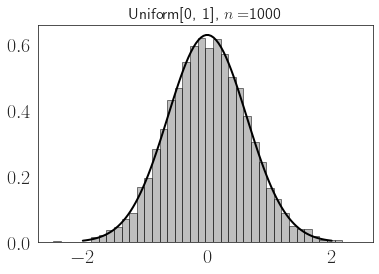

In [16]:
sns.set_style("white")

n = 1000
unif_dist = np.load(f"results/asymptotic/unif_{n}.npy")

# Asymptotic distribution.
x = np.linspace(-2,2, 100) 
f = np.exp(-x ** 2 / (2 * 0.4)) / np.sqrt(2 * np.pi * 0.4)
h = plt.plot(x, f, lw=2, color="k")

plt.title("Uniform[0, 1], " + r"$n = $" + f"{n}", fontsize=16)
plt.hist(np.sqrt(n) * unif_dist, bins=40, edgecolor='k', density=True, color="grey", alpha=0.5)
plt.show()

In [24]:
n = 20
n_sim = 10000

binom_dist = simulate_binom(n, n_sim)
np.save(f"results/asymptotic/binom_{n}.npy", binom_dist)

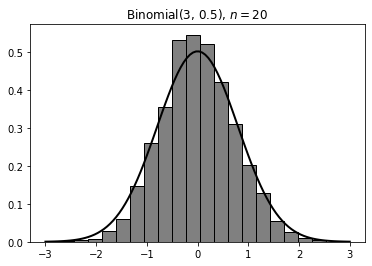

In [48]:
n = 20
binom_dist = np.load(f"results/asymptotic/binom_{n}.npy")

y = torch.sum(torch.bernoulli(0.5 *torch.ones((n, 3))), dim=1)
tau2 = get_tau2(y, n)

# Asymptotic distribution.
x = np.linspace(-3,3, 100) 
f = np.exp(-x ** 2 / (2 * tau2)) / np.sqrt(2 * np.pi * tau2)
h = plt.plot(x, f, lw=2, color="k")

plt.title("Binomial(3, 0.5), " + r"$n = $" + f"{n}")
plt.hist(np.sqrt(n) * binom_dist, bins=20, edgecolor='k', density=True, color="grey")
plt.show()

In [25]:
n = 1000
n_sim = 10000

binom_dist = simulate_binom(n, n_sim)
np.save(f"results/asymptotic/binom_{n}.npy", binom_dist)

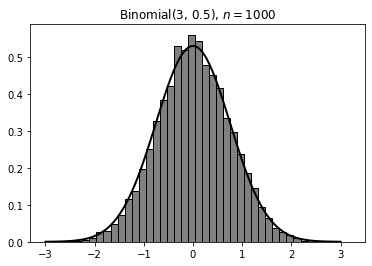

In [49]:
n = 1000
binom_dist = np.load(f"results/asymptotic/binom_{n}.npy")

y = torch.sum(torch.bernoulli(0.5 *torch.ones((n, 3))), dim=1)
tau2 = get_tau2(y, n)

# Asymptotic distribution.
x = np.linspace(-3,3, 100) 
f = np.exp(-x ** 2 / (2 * tau2)) / np.sqrt(2 * np.pi * tau2)
h = plt.plot(x, f, lw=2, color="k")

plt.title("Binomial(3, 0.5), " + r"$n = $" + f"{n}")
plt.hist(np.sqrt(n) * binom_dist, bins=40, edgecolor='k', density=True, color="grey")
plt.show()

In [14]:
def create_ax(ax, n, dist_name):

    dist = np.load(f"results/asymptotic/{dist_name}_{n}.npy")

    x = np.linspace(-3,3, 100) 
    if dist_name == "binom":
        y = torch.sum(torch.bernoulli(0.5 *torch.ones((n, 3))), dim=1)
        tau2 = get_tau2(y, n)
        f = np.exp(-x ** 2 / (2 * tau2)) / np.sqrt(2 * np.pi * tau2)
        title = "Binomial(3, 0.5), "
    elif dist_name == "unif":
        f = np.exp(-x ** 2 / (2 * 0.4)) / np.sqrt(2 * np.pi * 0.4)
        title = "Unif[0, 1], "

    # Asymptotic distribution.
    h = ax.plot(x, f, lw=2, color="k")

    ax.set_title(title + r"$n = $" + f"{n}")
    bins = 40 if n == 1000 else 20
    ax.hist(np.sqrt(n) * dist, bins=bins, edgecolor='k', density=True, color="grey")

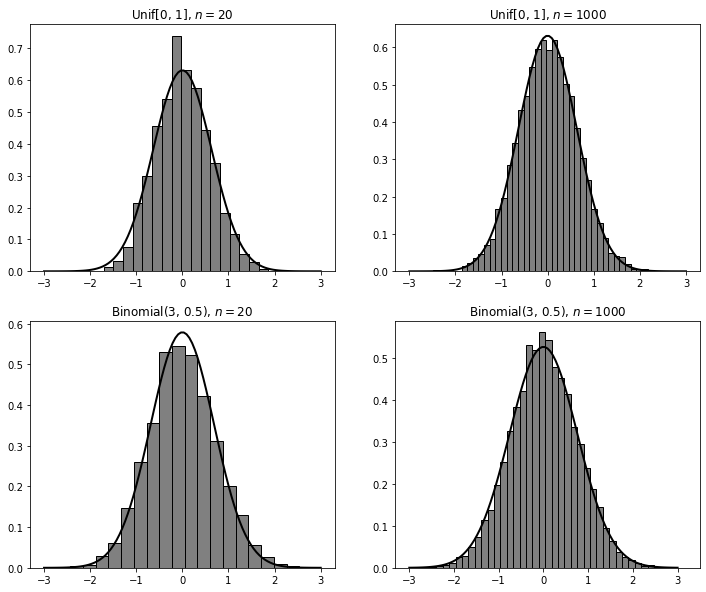

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

create_ax(axes[0, 0], 20, "unif")
create_ax(axes[0, 1], 1000, "unif")
create_ax(axes[1, 0], 20, "binom")
create_ax(axes[1, 1], 1000, "binom")

0.9999051094055176


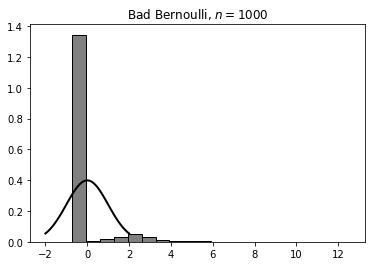

In [61]:
n = 1000
n_sim = 10000

np.random.seed(1234)

bad_dist = simulate_bad_bernoulli(n, n_sim)
y = torch.tensor(np.random.binomial(1, 0.99, size=(n,)))
tau2 = get_tau2(y, n)
print(tau2)

# Asymptotic distribution.
x = np.linspace(-2,2, 100) 
f = np.exp(-x ** 2 / (2 * tau2)) / np.sqrt(2 * np.pi * tau2)
h = plt.plot(x, f, lw=2, color="k")

plt.title("Bad Bernoulli, " + r"$n = $" + f"{n}")
plt.hist(np.sqrt(n) * bad_dist, bins=20, edgecolor='k', density=True, color="grey")
plt.show()

In [62]:
np.save(f"results/asymptotic/bad_dist2_{n}.npy", bad_dist)

In [14]:
n = 1000
n_sim = 10000

lam = 0.1
bad_dist = simulate_bad_poisson(n, n_sim, lam=lam)
np.save(f"results/asymptotic/bad_poisson_n_{n}_lam_{lam}.npy", bad_dist)

In [15]:
y = torch.tensor(np.random.poisson(lam=lam, size=(n,)))
print(np.bincount(y))
print(np.unique(y))

[926  71   3]
[0 1 2]


0.9909259080886841


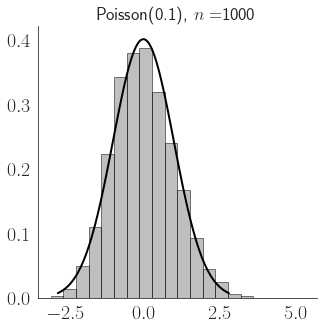

In [16]:
sns.set_style("white")
n = 1000
n_sim = 10000
lam = 0.1

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

np.random.seed(1234)

bad_dist = np.load(f"results/asymptotic/bad_poisson_n_{n}_lam_{lam}.npy")
y = torch.tensor(np.random.poisson(lam=lam, size=(n,)))
tau2 = get_tau2(y, n)
print(tau2)

# Asymptotic distribution.
x = np.linspace(-2.8,2.8, 100) 
f = np.exp(-x ** 2 / (2 * tau2)) / np.sqrt(2 * np.pi * tau2)
h = plt.plot(x, f, lw=2, color="k")

ax.set_title(f"Poisson({lam}), " + r"$n = $" + f"{n}", fontsize=18)
ax.hist(np.sqrt(n) * bad_dist, bins=20, edgecolor='k', density=True, color="grey", alpha=0.5)

sns.despine()
plt.savefig(f"figs/poisson_lam_{lam}.pdf", bbox_inches="tight")
plt.show()

In [17]:
def get_ranks(z):
    uq_vals,inverse_ixs,counts = torch.unique(z, sorted=True, return_inverse=True,return_counts=True)

    cumsum_counts = counts.cumsum(dim=0)
    possible_ranks = torch.zeros_like(counts )
    possible_ranks[1:] = cumsum_counts[:-1]
    ranks = possible_ranks[inverse_ixs]

    return cumsum_counts[inverse_ixs]

def _chatterjee(x, y, seed=0, device="cuda"):
    n = len(x)

    # Ties are broken at random. For the "argsort" command,
    # they are decided based on which index comes first, so we shuffle.
    torch.manual_seed(seed)
    perm = torch.randperm(n)
    x, y = x[perm].to(device), y[perm].to(device)

    # Compute rankings.
    idx = torch.argsort(x)
    r = get_ranks(y)[idx]
    l = get_ranks(torch.max(y) - y)[idx]

    # Compute statistic.
    num = n * torch.abs(r[1:] - r[:-1]).sum()
    denom = 2 * (l * (n - l)).sum()
    stat = (1 - num / denom).item()

    return stat, r, l

In [18]:
def chatterjee_perm_test(x, y, n_perm=200, device="cpu"):
  stat, r, l = _chatterjee(x, y, device=device)

  n = len(x)
  idx = torch.cat([torch.randperm(n).unsqueeze(0) for i in range(n_perm)]).to(device)

  R = r[idx]
  L = l[idx]

  num = n * torch.abs(R[:, 1:] - R[:, :-1]).sum(axis=1)
  denom = 2 * (L * (n - L)).sum(axis=1)

  return (1 - num / denom)

In [19]:
# Check my permutation test distribution.
n = 1000
lam = 0.1

bad_dist = np.load(f"results/asymptotic/bad_poisson_{n}.npy")

x = torch.rand(n)
y = torch.tensor(np.random.poisson(lam=lam, size=(n,)))

stat = chatterjee(x, y, compute_pvalue=False)
test_stats = chatterjee_perm_test(x, y, n_perm=10000)

np.save(f"results/asymptotic/bad_poisson_perm_test_n_{n}_lam_{lam}.npy", np.array(test_stats))

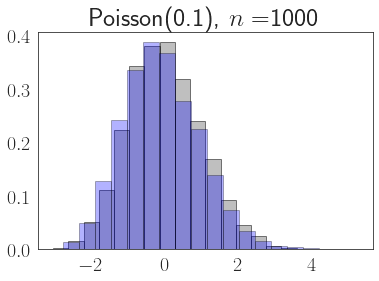

In [30]:
n = 1000
lam = 0.1

bad_dist = np.load(f"results/asymptotic/bad_poisson_n_{n}_lam_{lam}.npy")
test_stat = np.load(f"results/asymptotic/bad_poisson_perm_test_n_{n}_lam_{lam}.npy")

plt.title(f"Poisson({lam}), " + r"$n = $" + f"{n}")
plt.hist(np.sqrt(n) * bad_dist, alpha=0.5, bins=20, edgecolor='k', density=True, color="grey", label="True")
plt.hist(np.sqrt(n) * test_stat, alpha=0.3, bins=16, edgecolor='k', density=True, color="blue", label="Estimated")
plt.show()

In [26]:
# Check my permutation test distribution.
n = 1000
lam = 0.03

bad_dist = np.load(f"results/asymptotic/bad_poisson_{n}.npy")

x = torch.rand(n)
y = torch.tensor(np.random.poisson(lam=lam, size=(n,)))

stat = chatterjee(x, y, compute_pvalue=False)
test_stats = chatterjee_perm_test(x, y, n_perm=10000)

np.save(f"results/asymptotic/bad_poisson_perm_test_n_{n}_lam_{lam}.npy", np.array(test_stats))

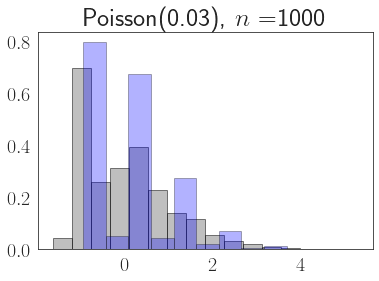

In [35]:
n = 1000
lam = 0.03

bad_dist = np.load(f"results/asymptotic/bad_poisson_n_{n}_lam_{lam}.npy")
test_stat = np.load(f"results/asymptotic/bad_poisson_perm_test_n_{n}_lam_{lam}.npy")

plt.title(f"Poisson({lam}), " + r"$n = $" + f"{n}")
plt.hist(np.sqrt(n) * bad_dist, alpha=0.5, bins=16, edgecolor='k', density=True, color="grey", label="True")
plt.hist(np.sqrt(n) * test_stat, alpha=0.3, bins=12, edgecolor='k', density=True, color="blue", label="Estimated")
plt.show()

In [28]:
# Check my permutation test distribution.
n = 1000
lam = 0.01

bad_dist = np.load(f"results/asymptotic/bad_poisson_{n}.npy")

x = torch.rand(n)
y = torch.tensor(np.random.poisson(lam=lam, size=(n,)))

stat = chatterjee(x, y, compute_pvalue=False)
test_stats = chatterjee_perm_test(x, y, n_perm=10000)

np.save(f"results/asymptotic/bad_poisson_perm_test_n_{n}_lam_{lam}.npy", np.array(test_stats))

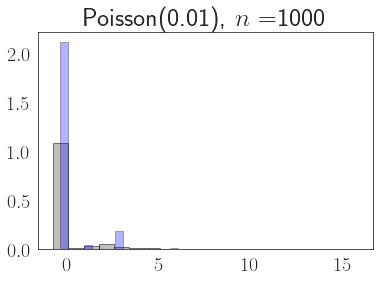

In [34]:
n = 1000
lam = 0.01

bad_dist = np.load(f"results/asymptotic/bad_poisson_n_{n}_lam_{lam}.npy")
test_stat = np.load(f"results/asymptotic/bad_poisson_perm_test_n_{n}_lam_{lam}.npy")

plt.title(f"Poisson({lam}), " + r"$n = $" + f"{n}")
plt.hist(np.sqrt(n) * bad_dist, alpha=0.5, bins=20, edgecolor='k', density=True, color="grey", label="True")
plt.hist(np.sqrt(n) * test_stat, alpha=0.3, bins=15, edgecolor='k', density=True, color="blue", label="Estimated")
plt.show()

In [82]:
torch.manual_seed(0)

x = torch.rand(n)
y = torch.tensor(np.random.binomial(1, 0.99, size=(n,)))

stat = chatterjee(x, y, compute_pvalue=False)
test_stats = chatterjee_perm_test(x, y, n_perm=10000)

np.save(f"results/asymptotic/bad_bernoulli_perm_test_{n}.npy", np.array(test_stats))

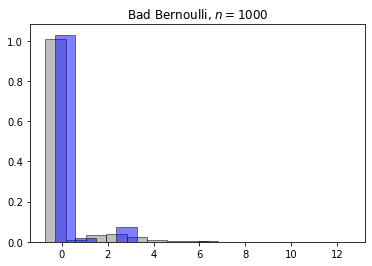

In [87]:
n = 1000

bad_dist = np.load(f"results/asymptotic/bad_dist2_{n}.npy")
test_stat = np.load(f"results/asymptotic/bad_bernoulli_perm_test_{n}.npy")

plt.title("Bad Bernoulli, " + r"$n = $" + f"{n}")
plt.hist(np.sqrt(n) * bad_dist, alpha=0.5, bins=15, edgecolor='k', density=True, color="grey", label="True")
plt.hist(np.sqrt(n) * test_stat, alpha=0.5, bins=8, edgecolor='k', density=True, color="blue", label="Estimated")
plt.show()

In [95]:
def get_power(n, n_sim):
    chat_rejects = 0
    perm_rejects = 0
    for i in range(n_sim):
        x = torch.rand(n)
        y = torch.tensor(np.random.binomial(1, 0.99, size=(n,)))
        stat, pval = chatterjee(x, y, compute_pvalue=True)
        if pval <= 0.05:
            chat_rejects += 1
        test_stats = chatterjee_perm_test(x, y, n_perm=3000)
        pval = torch.sum(test_stats >= stat).item() / 3000
        if pval <= 0.05:
            perm_rejects += 1
    chat_power = chat_rejects / n_sim
    perm_power = perm_rejects / n_sim

    return chat_power, perm_power


    

In [96]:
chat_powers = []
perm_powers = []
n_sim = 1000

for n in [10, 30, 100, 300, 1000]:
    print(n)
    chat_power, perm_power = get_power(n, n_sim)
    chat_powers.append(chat_power)
    perm_powers.append(perm_power)

10
30
100
300
1000


In [97]:
import pickle

pickle.dump(chat_powers, open("results/asymptotic/chat_powers.p", "wb"))
pickle.dump(perm_powers, open("results/asymptotic/perm_powers.p", "wb"))

In [98]:
print(chat_powers)
print(perm_powers)

[0.0, 0.02, 0.025, 0.037, 0.091]
[0.917, 0.723, 0.359, 0.063, 0.014]


In [99]:
chat_powers = []
perm_powers = []
n_sim = 1000

for n in [1500, 2000, 2500]:
    print(n)
    chat_power, perm_power = get_power(n, n_sim)
    chat_powers.append(chat_power)
    perm_powers.append(perm_power)

pickle.dump(chat_powers, open("results/asymptotic/chat_powers2.p", "wb"))
pickle.dump(perm_powers, open("results/asymptotic/perm_powers2.p", "wb"))

1500
2000
2500


In [100]:
print(chat_powers)
print(perm_powers)

[0.091, 0.124, 0.086]
[0.018, 0.03, 0.023]


In [101]:
chat_powers = []
perm_powers = []
n_sim = 1000

for n in [3000]:
    print(n)
    chat_power, perm_power = get_power(n, n_sim)
    chat_powers.append(chat_power)
    perm_powers.append(perm_power)

pickle.dump(chat_powers, open("results/asymptotic/chat_powers3.p", "wb"))
pickle.dump(perm_powers, open("results/asymptotic/perm_powers3.p", "wb"))

print(chat_powers)
print(perm_powers)

3000
[0.078]
[0.023]
